In [1]:
import numpy as np
from   matplotlib import pyplot as plt


In [46]:
# Generate multi-dimensioned noisy data and add a correlated column.
samples, features, corr, zero = 100, 2, 0.4, 0.001 # works in a few minutes
samples, features, corr, zero = 130, 2, 0.4, 0.001

found = False
i = 0
while not found:
    i += 1
    raw    = np.random.normal(0, 1, (samples, features))
    X      = np.concatenate((raw[:,0].reshape((samples,1)) ,  (corr * raw[:,0] + raw[:,1]).reshape(samples,1)), axis=1)
    a      = np.array([[5/6], [-0.225]])
    y      = np.matmul(X, a)

    X      = (X - np.mean(X, axis=0)) / np.std(X, axis=0)
    y      = (y - np.mean(y, axis=0)) / np.std(y, axis=0)

    ry = np.matmul(X.T,y) / len(X)
    C  = np.matmul(X.T,X) / len(X)

    ry2    = float(ry[1][0])
    c12    = float(C[0][1])

    if  c12 > corr and abs(ry2) < zero: found=True

    if i % 100000 == 0: print(i)

print(i)


100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2830071


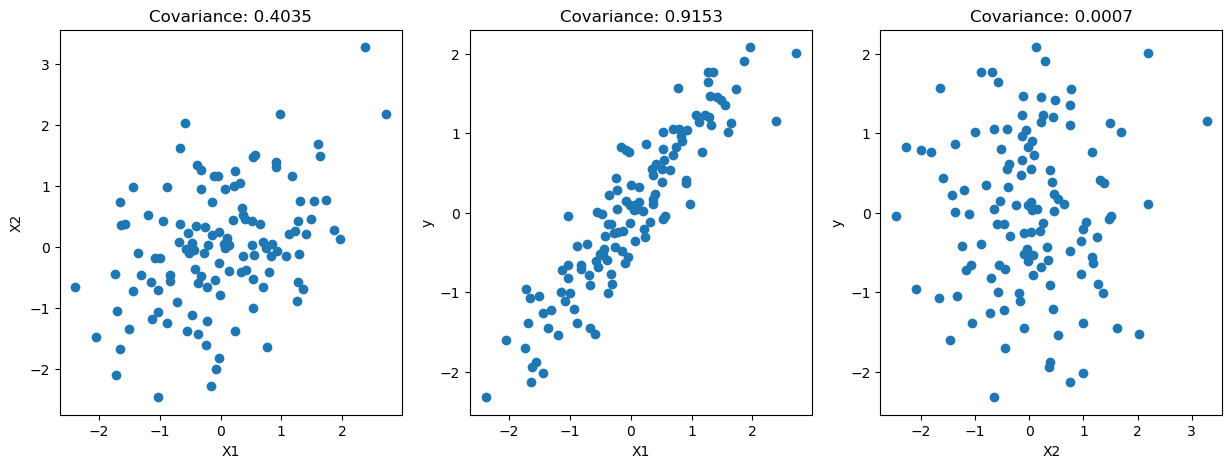

In [41]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].scatter(X[:, 0], X[:, 1])
ax[0].set_xlabel('X1')
ax[0].set_ylabel('X2')
ax[0].set_title('Covariance: ' + str(round(C[0][1],4)))
ax[1].scatter(X[:, 0], y)
ax[1].set_xlabel('X1')
ax[1].set_ylabel('y')
ax[1].set_title('Covariance: ' + str(np.round(ry[0][0],4)))
ax[2].scatter(X[:, 1], y)
ax[2].set_xlabel('X2')
ax[2].set_ylabel('y')
ax[2].set_title('Covariance: ' + str(np.round(ry[1][0],4)))
plt.show()

In [42]:
def model(X_v, y_v):

    C = np.matmul(X_v.T, X_v)
    x_mean = np.mean(X_v, axis=0)


    if type(C) is np.float64:
        inv_C = 1/C
        w     = inv_C * np.matmul(X_v.T, y)
        R2i   = w * np.matmul(X_v.T, X_v) * w / len(y_v)

    else:
        inv_C = np.linalg.inv(C)
        w     = np.matmul(np.matmul(inv_C, X_v.T), y)
        R2i   = np.matmul(np.diag(w.T.tolist()[0]), np.matmul(np.matmul(X_v.T, X_v), w)) / len(y_v)

    return w, R2i



In [43]:
print('X,    y ', model(X, y))
print('X[0], y ', model(X[:,0], y))
print('X[1], y ', model(X[:,1], y))

X,    y  (array([[ 1.09292244],
       [-0.4402915 ]]), array([[ 1.00031143e+00],
       [-3.11425266e-04]]))
X[0], y  (array([0.91526296]), array([0.83770629]))
X[1], y  (array([0.00070732]), array([5.0029607e-07]))


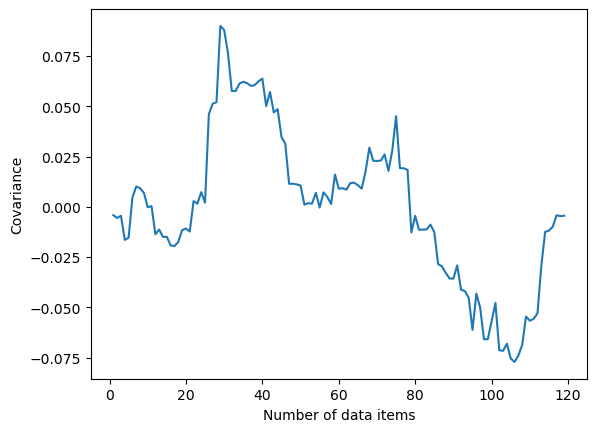

In [44]:
zeros  = [np.matmul(X[:i, :].T,y[:i])[1][0] / len(z) for i in range(1,samples)]
x_axis = [i for i in range(1,samples)]
plt.plot(x_axis, zeros)
plt.xlabel('Number of data items')
plt.ylabel('Covariance')
plt.show()

In [20]:
z = np.random.normal(0, 1, (samples, features))

In [21]:
np.matmul(z.T, z) / len(z)

array([[1.14999483, 0.0229285 ],
       [0.0229285 , 0.64106464]])